In [1]:
#director,writer
#actor if I can get to it
# Here I will work on the first recommendation
import pandas as pd 
import matplotlib.pyplot as plt
import sqlite3

In [2]:
#file_paths
tn_budgets_file_path = './../Data/Phase_1_Project_Data/tn.movie_budgets.csv.gz'
imdb_file_path = './../Data/Phase_1_Project_Data/im.db'



In [3]:
# compressed file is too large for github, file path for extracted files specified below
#creating the tn_budgets_df data Frame
tn_budgets_df = pd.read_csv(tn_budgets_file_path)


In [4]:
# here I am taking a look at the columns of the dataframe
tn_budgets_df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [5]:
tn_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [6]:
tn_budgets_df['production_budget_float'] = tn_budgets_df['production_budget'].str.replace(",","")
tn_budgets_df['production_budget_float'] = tn_budgets_df['production_budget_float'].str[1:]
tn_budgets_df['production_budget_float'] = tn_budgets_df['production_budget_float'].astype(float)

In [7]:
tn_budgets_df['domestic_gross_float'] = tn_budgets_df['domestic_gross'].str.replace(",","")
tn_budgets_df['domestic_gross_float'] = tn_budgets_df['domestic_gross_float'].str[1:]
tn_budgets_df['domestic_gross_float'] = tn_budgets_df['domestic_gross_float'].astype(float)

In [8]:
tn_budgets_df['worldwide_gross_float'] = tn_budgets_df['worldwide_gross'].str.replace(",","")
tn_budgets_df['worldwide_gross_float'] = tn_budgets_df['worldwide_gross_float'].str[1:]
tn_budgets_df['worldwide_gross_float'] = tn_budgets_df['worldwide_gross_float'].astype(float)

In [9]:
#delete all rows with zeros
tn_budgets_df = tn_budgets_df[tn_budgets_df['production_budget_float'] != 0]
tn_budgets_df = tn_budgets_df[tn_budgets_df['worldwide_gross_float'] != 0]
tn_budgets_df = tn_budgets_df[tn_budgets_df['domestic_gross_float'] != 0]

#sanity check
#tn_budgets_df.loc[tn_budgets_df['domestic_gross_float'] == 0]
#tn_budgets_df.loc[tn_budgets_df['worldwide_gross_float'] == 0]
#tn_budgets_df.loc[tn_budgets_df['production_budget_float'] == 0]

In [10]:
tn_budgets_df['net_income'] = tn_budgets_df['worldwide_gross_float'] - tn_budgets_df['production_budget_float']

In [11]:
tn_budgets_df = tn_budgets_df.loc[tn_budgets_df['net_income'] != 0]

In [12]:
tn_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_float,domestic_gross_float,worldwide_gross_float,net_income
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425000000.0,760507625.0,2.776345e+09,2.351345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410600000.0,241063875.0,1.045664e+09,6.350639e+08
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350000000.0,42762350.0,1.497624e+08,-2.002376e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330600000.0,459005868.0,1.403014e+09,1.072414e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",317000000.0,620181382.0,1.316722e+09,9.997217e+08


In [13]:
tn_budgets_df = tn_budgets_df.drop(['release_date','id','production_budget','domestic_gross','worldwide_gross'],axis=1)

In [14]:
tn_budgets_df.head()

,movie,production_budget_float,domestic_gross_float,worldwide_gross_float,net_income
0,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08


In [15]:
# compressed file is too large for github, file path for extracted files specified below
conn = sqlite3.connect(imdb_file_path) 

imdb_db = pd.read_sql('''
                               SELECT
                               *
                               FROM sqlite_master
                               ''', conn)
imdb_db

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [16]:
imdb_columns = pd.read_sql('''
                               SELECT
                               *
                               FROM sqlite_master
                               ''', conn)

In [17]:
imdb_columns.head()

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."


In [18]:
movie_basics_table = pd.read_sql('''
                               SELECT 
                               movie_basics.movie_id,movie_basics.primary_title
                               FROM movie_basics
                               INNER JOIN movie_akas ON movie_basics.movie_id = movie_akas.movie_id
                               WHERE is_original_title != 0.0
                               ''', conn)

In [19]:
movie_basics_table.head()

,movie_id,primary_title
0,tt0369610,Jurassic World
1,tt0401729,John Carter
2,tt10010134,Versailles Rediscovered - The Sun King's Vanis...
3,tt10027708,Miguelito
4,tt10050722,Thing I Don't Get


In [20]:
persons_table = pd.read_sql('''
                               SELECT
                               person_id,primary_name,death_year
                               FROM persons
                               ''', conn)

In [21]:
persons_table.head()

,person_id,primary_name,death_year
0,nm0061671,Mary Ellen Bauder,NaN
1,nm0061865,Joseph Bauer,NaN
2,nm0062070,Bruce Baum,NaN
3,nm0062195,Axel Baumann,NaN
4,nm0062798,Pete Baxter,NaN


In [22]:
writers_table = pd.read_sql('''
                               SELECT
                               *
                               FROM writers
                               ''', conn)

In [23]:
writers_table.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


In [24]:
writers_df = pd.merge(writers_table, persons_table,left_on='person_id',right_on='person_id')

In [25]:
writers_df.head()

,movie_id,person_id,primary_name,death_year
0,tt0285252,nm0899854,Tony Vitale,NaN
1,tt0438973,nm0175726,Steve Conrad,NaN
2,tt2358925,nm0175726,Steve Conrad,NaN
3,tt2543472,nm0175726,Steve Conrad,NaN
4,tt0359950,nm0175726,Steve Conrad,NaN


In [26]:
writers_df = pd.merge(writers_df,movie_basics_table,left_on='movie_id',right_on='movie_id')

In [27]:
writers_df.head()

,movie_id,person_id,primary_name,death_year,primary_title
0,tt0285252,nm0899854,Tony Vitale,NaN,Life's a Beach
1,tt2358925,nm0175726,Steve Conrad,NaN,Unfinished Business
2,tt2543472,nm0175726,Steve Conrad,NaN,Wonder
3,tt2543472,nm2113666,Jack Thorne,NaN,Wonder
4,tt2543472,nm0154716,Stephen Chbosky,NaN,Wonder


In [28]:
writers_df = pd.merge(tn_budgets_df,writers_df, how='inner',left_on='movie',right_on='primary_title')

In [29]:
# Here I am dropping all the rows in our dataframe where 'movie' is NAN
writers_df = writers_df.dropna(subset=['movie'])

# Here I am dropping all the duplicates
writers_df = writers_df.drop_duplicates(subset='movie')

#sanity checks
#writers_df['movie'].value_counts()
#writers_df['movie'].isnull().sum()


In [30]:
# Need to ensure that the writers are still alive
# Dropping all rows where death_year != Nan
writers_df = writers_df.loc[writers_df['death_year'].isna()]

In [31]:
print(len(writers_df))
print(writers_df['death_year'].isna().sum())


1628
1628


In [32]:
new_writers = writers_df.groupby(by=['primary_name'],as_index=False).mean()

In [34]:
new_writers = new_writers.sort_values(by=['net_income'],ascending=False)
new_writers.head()
new_writers = new_writers[:10]

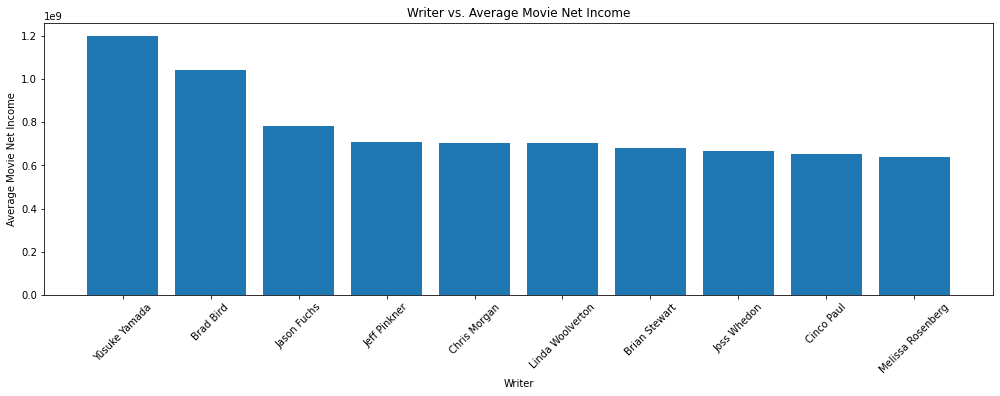

In [35]:
fig,ax = plt.subplots(figsize=(17,5))
ax.bar(new_writers['primary_name'],new_writers['net_income'])
ax.set_xlabel('Writer')
ax.set_ylabel('Average Movie Net Income')
ax.set_title('Writer vs. Average Movie Net Income')
plt.xticks(rotation=45);